In [1]:
#spline graphs
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
from scipy.interpolate import UnivariateSpline


In [2]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
percent = 5
perc = '5'
titles = ('gravity ', 'turbulence','magnetic fields', 'all + outflows')
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )


In [3]:
#plot setup
d = {}
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
input_file = inputfile[percent]
plot_data = np.load(input_file, allow_pickle=True)

starting
0
1
2
3


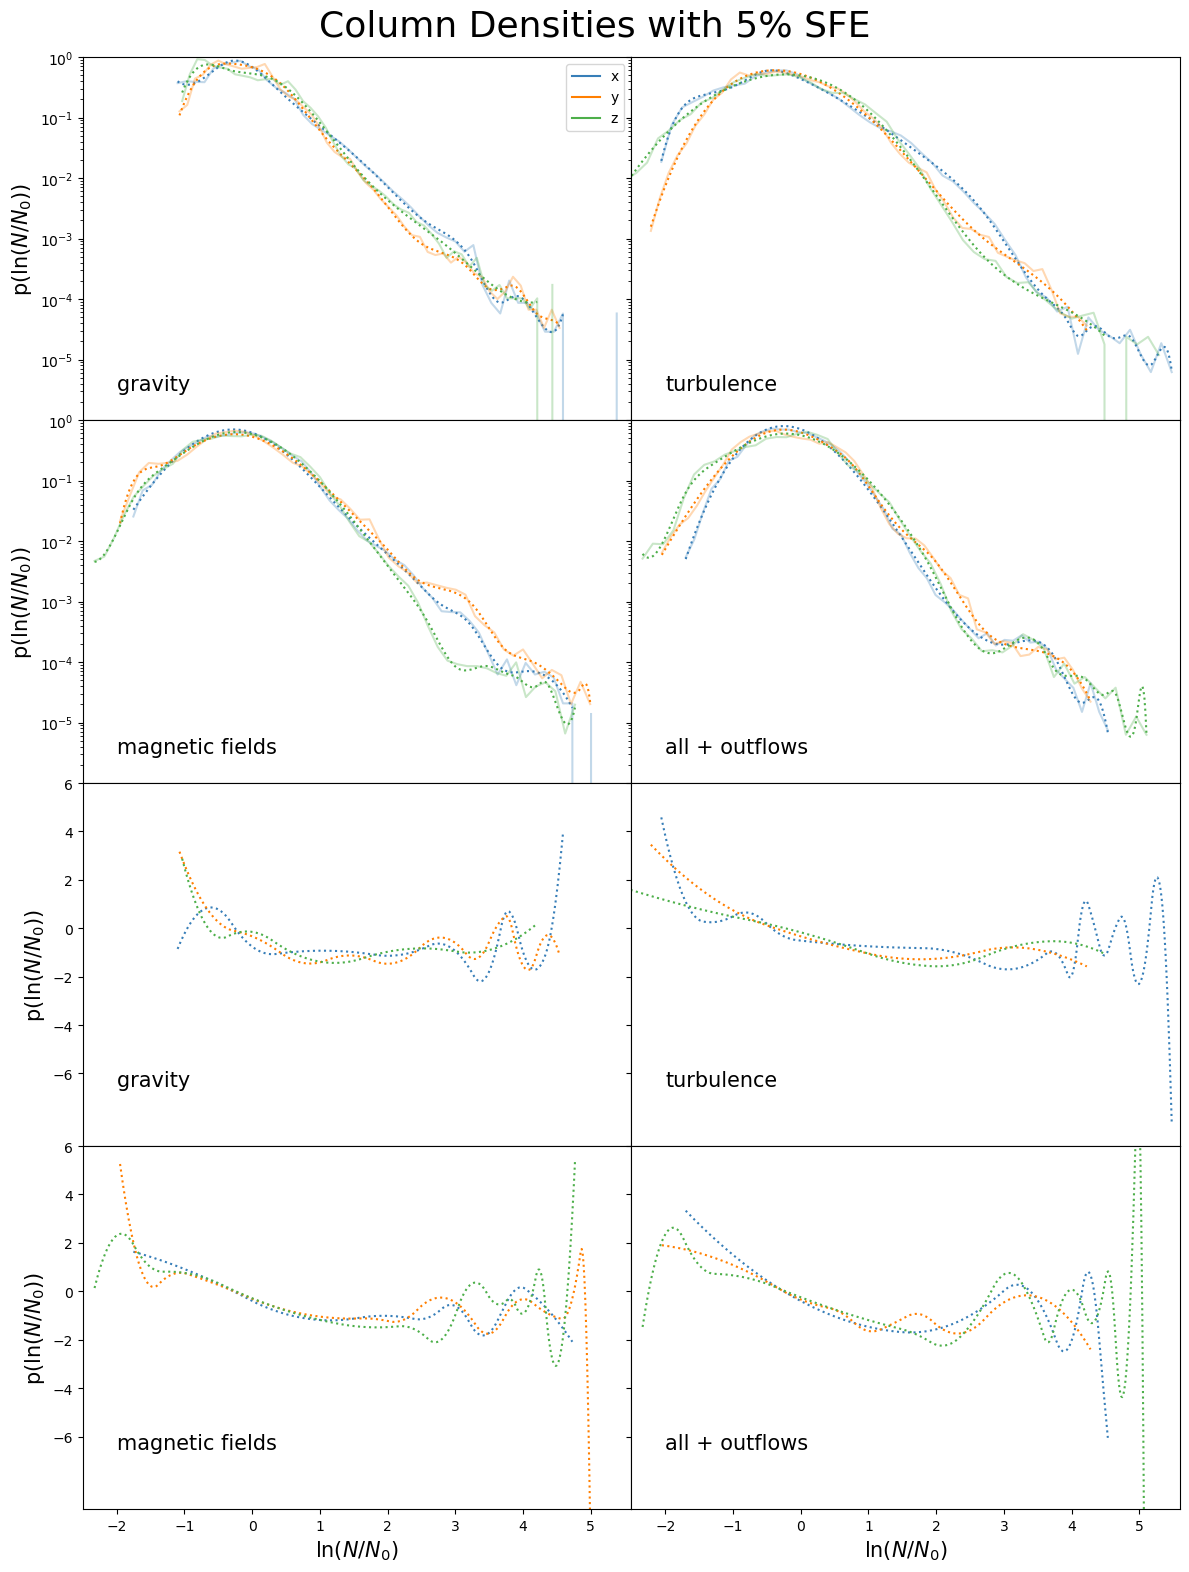

time: 1.030345364411672


In [17]:
#main processing cell. 
start = time.time()
print('starting')
spline_slope = []
slopes = []
error = []
color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(12,16), sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
ax =ax.ravel()
plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
b = 0
ax[0].plot(100,100, color = color_list[0], alpha =1)
ax[0].plot(100,100, color = color_list[1], alpha =1)
ax[0].plot(100,100, color = color_list[2], alpha =1)

legend1 = ax[0].legend([ 'x', 'y', 'z'], loc = 'upper right')

#leg4 =ax[0].plot(100,100, color = 'black', alpha =.3)
#leg5 =ax[0].plot(100,100, color = 'black', alpha =1, linestyle = ':')
#legend2 = ax[0].legend([leg4,leg5],['column density','spline fit'], loc = 'lower right')
#ax[0].add_artist(legend1)

for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
    print(n)     #for time keeping
    
    for a in (range(3)):
        xx =[]
        y = []
        spline = []

        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)

        for i in range(len(bin_list)):
            
            if counts_d[i] > 0:
                    xx.append(bin_list[i])
                    y.append(counts_d[i])
            else:
                break
        spl = UnivariateSpline(xx, np.log10(y), k = 3, s = .3)
        x = np.linspace(min(xx), max(xx), 500)
        spl = UnivariateSpline(xx, np.log10(y), k = 3, s = .3)
        pdf_density_fit = x
        pdf_counts_fit = 10**spl(x)
        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
        ax[n].plot(x, 10**spl(x), label = 'fit', color =color_list[a], linestyle = ':')
        
        deriv = spl.derivative(1)
        pdf_counts_deriv = deriv(x)
        ax[n+4].plot(x, deriv(x), label = 'fit',color =color_list[a], linestyle = ':')
        
        #recording spline slope
        z=0
        for zz in x:
            if zz > 1:
                if zz < 4:
                    spline.append(pdf_counts_deriv[z])
            z = z+1
        spline_slope.append(sum(spline)/len(spline))


        
    if n > 1:
        ax[n+4].set_xlabel(r'ln($N/N_0$)', size=15)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
    
    if n == 0 or n == 2:
        ax[n+4].set_ylabel(r'p(ln($N/N_0$))', size=15)
    

    ax[n].annotate(titles[n],[-2,10**(-5.5)], size =15)
    ax[n+4].annotate(titles[n],[-2,-6.5], size =15)
    ax[n].set_yscale('log')
    ax[n].set_ylim(10**(-6),1)
    ax[n].set_xlim(-3,6)
    ax[n].set_yticks((1e0,1e-1,1e-2,1e-3,1e-4,1e-5))
    ax[n+4].set_yscale('linear')
    ax[n+4].set_ylim(-9,6)
    ax[n+4].set_xlim(-2.5,5.6)
    ax[n+4].set_yticks((6,4,2,0,-2,-4,-6))
    
plt.tight_layout()
plt.subplots_adjust(top=.95)
plt.savefig('spline_4lv_'+perc+'%', bbox_inches='tight')
plt.show()


end = time.time()
print("time:",(end-start)/60)

In [18]:
spline_slope

[-0.9527496740121277,
 -0.9031079340851093,
 -0.9844578430661135,
 -1.1611387922421166,
 -1.068320092125942,
 -1.1085989644397198,
 -1.0200296800657034,
 -0.9755604804645975,
 -1.1072762185937681,
 -1.1143598596272581,
 -1.0166504584939777,
 -1.0809228193410456]

In [32]:
y

[0.00932320229382411,
 0.01209881213702362,
 0.01795843291711158,
 0.04505028283962325,
 0.061039693389336985,
 0.0904148975631987,
 0.11340264062354362,
 0.17673754984475706,
 0.21054898513552753,
 0.29436291313573243,
 0.38652146303632573,
 0.455194083494462,
 0.5192406875472637,
 0.4881811389386412,
 0.501638102045947,
 0.5179596368504038,
 0.46072751081007135,
 0.38145656815151235,
 0.29490261504968834,
 0.25555775244330775,
 0.2546266183719787,
 0.20327190548252333,
 0.164911554059843,
 0.1183014733809857,
 0.08536186425891225,
 0.04405391007539777,
 0.025609152356700138,
 0.014595674837850554,
 0.00680854722220741,
 0.003594058899527605,
 0.001885991303712516,
 0.0009429956518562528,
 0.0005990098165879342,
 0.00045667085027001174,
 0.00042701689895377487,
 0.00023130082026662804,
 0.00018385449816065306,
 0.000189785288423901,
 0.00011861580526493746,
 8.303106368545623e-05,
 5.930790263246905e-05,
 4.744632210597498e-05,
 5.337711236922186e-05,
 5.930790263246873e-05,
 1.779237